# Part I: Data Preparation

## Read data from csv

In [2]:
import os 
import tarfile
from six.moves import urllib
import numpy as np
import pandas as pd

DATA_DIR = 'data'
CSV_FILE = DATA_DIR + '/Appt_NoShowdf.csv'

Appt_NoShowdf = pd.read_csv(CSV_FILE, 
                        dtype={ 'Age': np.float64
                              },
                       parse_dates = ['ScheduledDay', 'AppointmentDay'])
Appt_NoShowdf.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
Appt_NoShowdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null float64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(2), int64(7), object(3)
memory usage: 11.8+ MB


## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle

In [4]:
clean_Appt_NoShowdf = Appt_NoShowdf.copy()
clean_Appt_NoShowdf.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# do data cleanup here
# highly recommend that you rename dataset
# e.g., if you used appt_df = pd.read_csv(...) above
# first thing to do here is clean_appt_df = appt_df
clean_Appt_NoShowdf.rename(columns = {'Handcap': 'Handicap', 'Neighbourhood': 'Hospital_Loc', 'PatientId': 'PatientID', 'No-show': 'Noshow', 'Hipertension': 'Hypertension'}, inplace  = True)
print(clean_Appt_NoShowdf.columns)

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Hospital_Loc', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Noshow'],
      dtype='object')


In [6]:
print('Age:',sorted(clean_Appt_NoShowdf.Age.unique()))
print('Gender:',clean_Appt_NoShowdf.Gender.unique())
print('Diabetes:',clean_Appt_NoShowdf.Diabetes.unique())
print('Alcoholism:',clean_Appt_NoShowdf.Alcoholism.unique())
print('Hipertension:',clean_Appt_NoShowdf.Hypertension.unique())
print('Handicap:',clean_Appt_NoShowdf.Handicap.unique())
print('AppointmentID:',clean_Appt_NoShowdf.AppointmentID.unique())
print('Scholarship:',clean_Appt_NoShowdf.Scholarship.unique())
print('SMS_received:',clean_Appt_NoShowdf.SMS_received.unique())
print('Hospital_Loc:', clean_Appt_NoShowdf.Hospital_Loc.unique())
print('PatientID:', clean_Appt_NoShowdf.PatientID.unique())
print('ScheduledDay:', clean_Appt_NoShowdf.ScheduledDay.unique())




Age: [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 102.0, 115.0]
Gender: ['F' 'M']
Diabetes: [0 1]
Alcoholism: [0 1]
Hipertension: [1 0]
Handicap: [0 1 2 3 4]
AppointmentID: [5642903 5642503 5642549 ..., 5630692 5630323 5629448]
Scholarship: [0 1]
SMS_received: [0 1]
Hospital_Loc: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERRE

In [7]:
# Remove negative ages
clean_Appt_NoShowdf= clean_Appt_NoShowdf[(clean_Appt_NoShowdf.Age >= 0) & (clean_Appt_NoShowdf.Age <= 110)]
# clean_appt_df = clean_appt_df.drop(clean_appt_df[clean_appt_df['Age'] < 0].index)

In [8]:
clean_Appt_NoShowdf.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hospital_Loc,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
clean_Appt_NoShowdf.to_csv('processed_data/clean_Appt_NoShowdf.csv', index=False)

## Test set creation

- Create a test set of 20k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [10]:
PROCESSED_DATA_DIR = 'processed_data'
clean_Appt_NoShowdf = pd.read_csv(PROCESSED_DATA_DIR + "/clean_Appt_NoShowdf.csv",
                           parse_dates=['AppointmentDay', 'ScheduledDay'])
# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example

# check class proportions in complete dataset
clean_Appt_NoShowdf['Noshow'].value_counts() / len(clean_Appt_NoShowdf)





No     0.798084
Yes    0.201916
Name: Noshow, dtype: float64

In [11]:
# create test set with stratified sampling here
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1234)
for train_index, test_index in split.split(clean_Appt_NoShowdf, clean_Appt_NoShowdf["Noshow"]):
    train_set = clean_Appt_NoShowdf.loc[train_index]
    test_set = clean_Appt_NoShowdf.loc[test_index]
    


In [12]:
# check class proportions on train and test sets to make sure 
# properly stratified
print("Train set:")
print(train_set['Noshow'].value_counts() / len(train_set))

print("Test set:")
print(test_set['Noshow'].value_counts() / len(test_set))

Train set:
No     0.79808
Yes    0.20192
Name: Noshow, dtype: float64
Test set:
No     0.7981
Yes    0.2019
Name: Noshow, dtype: float64


In [13]:
# save train and test sets as csvs
train_set.to_csv(PROCESSED_DATA_DIR + '/train_set.csv', index=False)
test_set.to_csv(PROCESSED_DATA_DIR + '/test_set.csv', index=False)

In [14]:
# copy data frame to only use train set
clean_Appt_NoShowdf = train_set.copy()
clean_Appt_NoShowdf.shape

(88416, 14)

## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

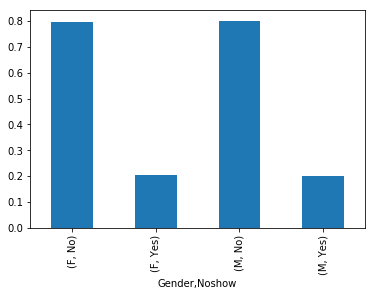

In [15]:
%matplotlib inline

import matplotlib

# is there a difference in the no show rate based on gender
clean_Appt_NoShowdf.groupby('Gender')['Noshow'].value_counts(normalize=True).plot.bar()

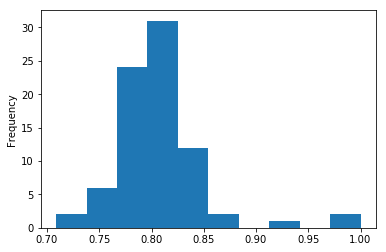

In [16]:

# does the no show rate differ across neightborhoods?

# make a histogram of proportion of appointments
# where people show up across neighborhoods
clean_Appt_NoShowdf.groupby('Hospital_Loc')['Noshow']\
             .value_counts(normalize=True)\
             .loc[:,'No']\
             .plot.hist()

In [17]:

# how about the other variables
columns = ['Noshow', 'Scholarship', 'Hypertension', 'Diabetes',
           'Alcoholism', 'Handicap', 'SMS_received']
clean_Appt_NoShowdf[columns].groupby('Noshow').mean()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
Noshow,,,,,,
No,0.094299,0.205646,0.074614,0.030710,0.022746,0.291215
Yes,0.116787,0.167311,0.064359,0.030527,0.020221,0.437125


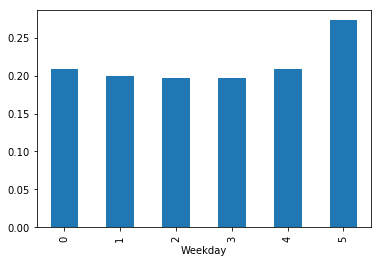

In [18]:
# does the day of the week matter?
clean_Appt_NoShowdf['Weekday'] = clean_Appt_NoShowdf['AppointmentDay'].dt.weekday
clean_Appt_NoShowdf.groupby('Weekday')['Noshow']\
    .value_counts(normalize=True)\
    .loc[:,'Yes']\
    .plot.bar()

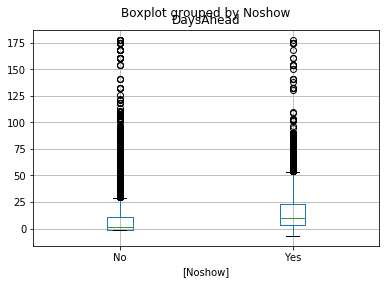

In [19]:
clean_Appt_NoShowdf['DaysAhead'] = (clean_Appt_NoShowdf['AppointmentDay'] - clean_Appt_NoShowdf['ScheduledDay'])\
    .dt.days

clean_Appt_NoShowdf[['DaysAhead','Noshow']].boxplot(by='Noshow')

## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [22]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# github.com/pandas-dev/sklearn-pandas
# install with pip install sklearn-pandas
from sklearn_pandas import DataFrameMapper

class WeekdayTransform(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X['AppointmentDay'].dt.weekday.values

weekday_mapper = DataFrameMapper([
    (['AppointmentDay'], WeekdayTransform())
], input_df=True)
    

weekday_pipeline = Pipeline([
    ('weekday_adder', weekday_mapper),
    ('weekday_encoder', OneHotEncoder(n_values=7))
])


class DaysAheadTransform(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        daysahead = (X['AppointmentDay'] - X['ScheduledDay'])\
            .dt.days\
            .values\
            .astype('float64')
        return daysahead
    
daysahead_mapper = DataFrameMapper([
    (['AppointmentDay', 'ScheduledDay'], DaysAheadTransform())
], input_df=True)

daysahead_pipeline = Pipeline([
    ('mapper', daysahead_mapper),
    ('scaler', StandardScaler())
])

date_pipeline = FeatureUnion(transformer_list=[
    ('weekday_pipeline', weekday_pipeline),
    ('daysahead_pipeline', daysahead_pipeline)
])

numeric_attributes = ['Scholarship',
                      'Hypertension',
                      'Diabetes',
                      'Alcoholism',
                      'SMS_received'
                     ]

num_mapper = DataFrameMapper(list(zip(numeric_attributes, [None for x in numeric_attributes])))

df_mapper = DataFrameMapper([
    (['Age'], StandardScaler()),
    ('Gender', LabelBinarizer()),
    ('Hospital_Loc', LabelBinarizer()),
    (['Handicap'], OneHotEncoder())
])


full_pipeline = FeatureUnion(transformer_list=[
    ('date_pipeline', date_pipeline),
    ('num_mapper', num_mapper),
    ('df_mapper', df_mapper)
])

In [23]:
clean_df = pd.read_csv(PROCESSED_DATA_DIR + "/train_set.csv", parse_dates=['ScheduledDay','AppointmentDay'],
                      dtype={'Age': np.float64})
clean_df_labels = clean_df['Noshow'].copy()
clean_df = clean_df.drop('Noshow', axis=1)
clean_df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hospital_Loc,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,2.325867e+14,5537835,F,2016-04-01 10:41:26,2016-06-03,19.0,JARDIM CAMBURI,0,0,0,0,0,1
1,4.658612e+13,5645843,M,2016-05-02 10:27:55,2016-05-02,45.0,JARDIM CAMBURI,0,0,0,0,0,0
2,9.687129e+13,5681170,F,2016-05-10 13:44:03,2016-05-17,14.0,ILHA DO PRÍNCIPE,0,0,0,0,0,0
3,7.241818e+13,5771344,F,2016-06-03 12:33:11,2016-06-06,47.0,SÃO JOSÉ,0,1,0,0,0,0
4,4.545378e+13,5774538,M,2016-06-06 08:22:07,2016-06-06,2.0,PRAIA DO SUÁ,0,0,0,0,0,0


In [24]:
full_pipeline.fit(clean_df)
appt_mat = full_pipeline.transform(clean_df)

In [25]:
appt_mat.shape

(88416, 101)

In [26]:
appt_mat[:5,:].toarray()

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  3.46420395,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        , -0.78280677,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 